# Week 2, Lab 1

**Objectives:**

- Gain more sophistication with Python as a programming language
- Practice writing conditional expressions in Python
- Filter and aggregate spatially explicit data

For this lab, we'll be working with data on **Net Primary Productivity (NPP).** Plants (primary producers) take up carbon dioxide from the atmosphere and use it create carbon compounds they store for energy; this is called *photosynthesis.* But plants also have to spend that energy to sustain their metabolism; this requires them to burn carbon compounds, so some of that stored carbon is returned to the atmosphere. **NPP is the amount of carbon (C) stored in plant tissues after accounting for the C they lose in respiration.**

    NPP = [C fixed in photosynthesis] - [C lost in plant respiration]
    
NPP is often measured in grams of carbon (C) per square meter per unit time. It's most convenient to estimate NPP on annual time scales, so the data here are in grams of carbon (C) per square meter (m$^{-2}$) per year (g C m$^{-2}$ year$^{-1}$).

We'll be working with two datasets:

- [Multiple-biome NPP estimates from the Global Primary Production Data Initiative (GPPDI)](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=617)
- [The Global Osnabruck Data on NPP (1937-1981)](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=214)

Some of the abbreviations used in these dataset(s) include:

**Biome types:**

- C3 and C4 refer to two different kinds of photosynthesis; most plants are C3 but C4 plants include important agricultural varieties like corn.
- ENL refers to Evergreen Needleleaf ("coniferous" trees)
- DNL refers to Deciduous Needleleaf (like a Western Larch, it loses its needles in the fall)
- EBL refers to Evergreen Broadleaf, like broad-leaved tropical trees
- DBL refers to Deciduous Broadleaf, like an Oak or Maple, which lose leaves in the fall

# Lab 1, Part 1: NPP by Biome Using GPPDI Data

How do rates of NPP (i.e., the amount of C fixed in plant tissues per unit area per unit time) vary between different biomes?

Let's take a look at the data.

In [1]:
import pandas as pd

pd.read_csv("http://files.ntsg.umt.edu/data/GIS_Programming/data/GPPDI_ClassA_NPP_162_R2.csv")

,SITE_ID,LAT_DD,LONG_DD,LAT_OLD,LONG_OLD,ELEV_GIV,SOURCE,COUNTRY,BIOMENEW,VEG_TYPE,SPECIES,TEMP_ANN,PREC_ANN,ANPP_C,BNPP_C,TNPP_C,REFERENC,YEAR_REF,MEAS_ID
0,4,-27.75,152.45,-27.75,152.45,-999,Day,Australia,grassland / C4 tropical,grassland,Heteropogon sp.,18.5,917,165,99,264,NaN,NaN,1
1,5,-27.03,152.02,-27.03,152.02,-999,Day,Australia,grassland / C4 tropical,grassland,Heteropogon sp.,17.5,848,106,70,175,NaN,NaN,2
2,6,-26.76,148.82,-26.76,148.82,-999,Day,Australia,grassland / C4 tropical,grassland,Cenchrus ciliaris,20.4,541,68,41,110,NaN,NaN,4
3,6,-26.76,148.82,-26.76,148.82,-999,Day,Australia,grassland / C4 tropical,grassland,Aristida sp.,20.4,541,106,58,164,NaN,NaN,3
4,7,-26.58,148.77,-26.58,148.77,-999,Day,Australia,grassland / C4 tropical,grassland,Thyridolepis mitchell,20.5,553,105,57,161,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,145,64.75,-148.25,64.75,-148.25,-999,STG,USA,ENL forest / boreal,Boreal Forest / Evergreen,Picea glauca,-3.5,269,310,71,431,"Ruess, R.W. et al. 1996; Oechel, W.C.& Van Cle...",1996.0,171
158,145,64.75,-148.25,64.75,-148.25,-999,STG,USA,ENL forest / boreal,Boreal Forest / Deciduous,Populus balsami,-3.5,269,415,197,612,"Ruess, R.W. et al. 1996; Oechel, W.C.& Van Cle...",1996.0,169
159,145,64.75,-148.25,64.75,-148.25,-999,STG,USA,ENL forest / boreal,Boreal Forest / Deciduous,Betula papyrifera,-3.5,269,540,124,669,"Ruess, R.W. et al. 1996; Oechel, W.C.& Van Cle...",1996.0,168
160,145,64.75,-148.25,64.75,-148.25,-999,STG,USA,ENL forest / boreal,Boreal Forest / Deciduous,Alnus populus,-3.5,269,635,160,795,"Ruess, R.W. et al. 1996; Oechel, W.C.& Van Cle...",1996.0,167


**There are three different columns that describe NPP:**

- `ANPP_C` refers to Above-ground NPP; this is the portion of NPP (carbon) that is stored in the parts of plants above ground, like leaves, stems, and tree trunks.
- `BNPP_C` refers to Below-ground NPP; this is the portion of NPP (carbon) that is stored in below-ground plant parts, specifically the roots.
- `TNPP_C` is the sum of `ANPP_C` and `BNPP_C`.

In [2]:
# Load the data with just a subset of the columns
data = pd.read_csv("http://files.ntsg.umt.edu/data/GIS_Programming/data/GPPDI_ClassA_NPP_162_R2.csv",
                  usecols = ["SITE_ID", "LAT_DD", "LONG_DD", "BIOMENEW", "TNPP_C"])

In [3]:
type(data)

pandas.core.frame.DataFrame

You haven't seen this type of object in Python before, but a pandas "DataFrame" is a data structure for holding tabular (row-column) data.

In [4]:
data.columns

Index(['SITE_ID', 'LAT_DD', 'LONG_DD', 'BIOMENEW', 'TNPP_C'], dtype='object')

We can iterate through the table row-by-row if we convert the DataFrame to a NumPy array:

In [5]:
for row in data.to_numpy():
    print(row)

[4 -27.75 152.45 'grassland / C4 tropical' 264]
[5 -27.03 152.02 'grassland / C4 tropical' 175]
[6 -26.76 148.82 'grassland / C4 tropical' 110]
[6 -26.76 148.82 'grassland / C4 tropical' 164]
[7 -26.58 148.77 'grassland / C4 tropical' 161]
[8 -26.48 148.68 'grassland / C4 tropical' 151]
[8 -26.48 148.68 'grassland / C4 tropical' 161]
[9 -26.4 146.27 'grassland / C3' 72]
[9 -26.4 146.27 'grassland / C3' 111]
[10 -25.67 151.75 'grassland / C4 tropical' 158]
[10 -25.67 151.75 'grassland / C4 tropical' 196]
[10 -25.67 151.75 'grassland / C4 tropical' 214]
[10 -25.67 151.75 'grassland / C4 tropical' 299]
[10 -25.67 151.75 'grassland / C4 tropical' 305]
[10 -25.67 151.75 'grassland / C4 tropical' 362]
[11 -25.08 146.5 'grassland / C4 tropical' 331]
[14 -24.19 150.69 'grassland / C4 tropical' 230]
[15 -24.16 150.95 'grassland / C4 tropical' 170]
[15 -24.16 150.95 'grassland / C4 tropical' 206]
[15 -24.16 150.95 'grassland / C4 tropical' 711]
[16 -23.3 150.51 'grassland / C4 tropical' 240]
[17

---

## Problem 1.1: Sorting Latitude and Longitude

What are the mininum and maximum latitude and longitude in this dataset for each hemisphere? For instance, in the Northern Hemisphere (latitudes between 0 and 90 deg N), what is the lowest (minimum) and highest (maximum) latitude? Find this for:

- Latitudes in the Northern hemisphere
- Latitudes in the Southern hemisphere
- Longitudes in the Western hemisphere
- Longitudes in the Eastern hemisphere

**Hint:**

There are `max()` and `min()` functions built into Python...

In [31]:
max([1, 3, 5, 9])

9

In [32]:
min([1, -1, 2, 12, 0])

-1

---

## Problem 1.2: What are the Unique Biomes?

Write a Python code block that prints the unique biome names in this dataset. **You should use a `for` loop to do this.** If you know a better way, feel free to show multiple ways of doing the same thing. You'll also need to store the unique names as a Python `list` so you can use it later.

As an example, here's how we might iterate through the "BIOMENEW" values in each row...

In [6]:
# Print just the biome type
for row in data.to_numpy():
    # We can "unpack" each element in a row
    site_id, latitude, longitude, biome, npp = row
    print(biome)

grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C3
grassland / C3
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
DBL forest / tropical
EBL forest / tropical
DBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
grassland / C4 tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
grassland / C4 tropical
grassland / C4 tropical
EBL forest / tropical
EBL forest / tro

---

## Problem 1.3: Summarize Total NPP by Biome

Now that you have a list of unique biomes, calculate the mean total NPP for each biome. Display the results in some meaningful way. I included a script for plotting the data if you want to use that.

<BarContainer object of 5 artists>

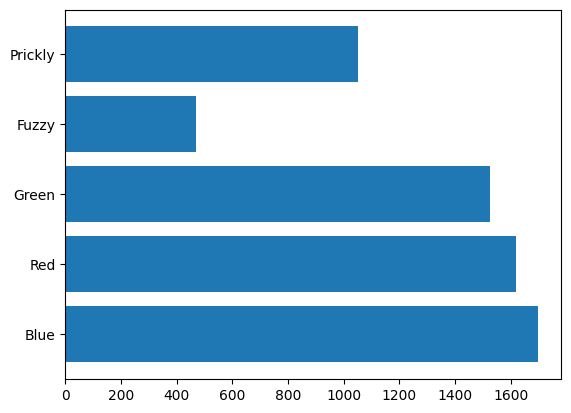

In [11]:
import numpy as np
from matplotlib import pyplot

# By now, you'll have a list of the *real* biome names
unique_biomes = ['Blue', 'Red', 'Green', 'Fuzzy', 'Prickly']

# If you calculated the average NPP by biome and stored it in npp_by_biome...for now, we'll use random values
npp_by_biome = np.random.randint(0, 2000, len(unique_biomes))

# A horizontal bar plot, assuming you have a list "unique_biomes" of the unique biome labels
pyplot.barh(unique_biomes, npp_by_biome)

---

## Challenge Yourself (Optional):

If you want to take these examples further, consider:

- Is there a relationship between mean annual temperature (`TEMP_ANN`) or mean annual precipitation (`PREC_ANN`) and total NPP?
- How many records of each biome type are in each country? That is, can you do a *cross-tabulation* of countries and biome types?

These are NOT eligible for extra credit, but feel free to include them in your submitted lab report.

---

# Lab 1, Part 2: Global Osnabruck Dataset: Working with Imperfect Data

In [15]:
data2 = pd.read_csv("http://files.ntsg.umt.edu/data/GIS_Programming/data/ods_npp.csv", skiprows = 4)

# The first two "rows" are actually mostly empty lines the authors put in between the header and the real data
data2[2:]

,NPP ID,Country,Author,Year,Latitude,Longitude,LL flag,ANPP Min,ANPP max,BNPP min,BNPP max,TNPP min,TNPP max,NPP g C,NPP flag,Temp,Precip,Vegetation type,Species (mostly in order of importance),Soil remarks
2,259,USA,"Adegbola, A.R., et al.",1966.0,34.00,-118.00,+,-999,-999,-999,-999,2720,2720,1292,F,-999,-999,Pasture,Cynodon dactylon,
3,451,Trinidad,"Adeniyi, S.A., et al.",1960.0,10.50,-61.25,*,-999,-999,-999,-999,4930,4930,2342,na,-999,-999,Pasture,Digitaria decumbens,
4,793,USSR,"Afanas`Yeva, Y.A.",1947.0,51.70,36.20,?,-999,-999,-999,-999,300,400,190,na,-999,-999,Grassland / meadow steppe,na,
5,1058,Spain,"Alvera, B.",1973.0,42.50,-0.65,+,1756,1756,-999,-999,-999,-999,1668,na,8,802,Forest,Pinus sylvestris; Ilex aquifolium; Fagus sylva...,Calcareous well-drained
6,830,India,"Ambasht, R.S., et al.",1971.0,26.42,85.05,?,-999,-999,-999,-999,2880,2880,1368,na,-999,-999,Grassland,na,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,441,Mexico,"Zedler, J., et al.",1978.0,32.58,-117.17,?,-999,-999,-999,-999,630,630,299,na,-999,-999,Wetland / salt-marsh,Mixed succulents,
718,435,USA,"Zedler, J., et al.",1978.0,32.58,-117.17,*,-999,-999,-999,-999,920,920,437,na,-999,-999,Wetland / salt-marsh,Spartina foliosa,
719,428,USA,*,1975.0,40.50,-124.25,?,265,265,-999,-999,-999,-999,252,na,-999,-999,na,Cupressus pygmaea; Pinus contorta,
720,429,USA,*,1975.0,40.50,-124.25,?,1020,1020,-999,-999,-999,-999,969,na,-999,-999,na,Pinus muricata,


---

The Global Onsabruck Dataset has a number of NPP records that are from the same location. If we wanted to combine these data with other environmental covariates and train a model to predict NPP, we'd need to first eliminate the duplicate entries. More specifically, we should probably average the data for each unique latitude-longitude coordinate pair.

In [17]:
data2 = pd.read_csv("http://files.ntsg.umt.edu/data/GIS_Programming/data/ods_npp.csv", skiprows = 4,
                  usecols = ['NPP ID', 'Latitude', 'Longitude', 'NPP g C'])

# The first two "rows" are actually mostly empty lines the authors put in between the header and the real data
data2 = data2[2:]
data2

,NPP ID,Latitude,Longitude,NPP g C
2,259,34.00,-118.00,1292
3,451,10.50,-61.25,2342
4,793,51.70,36.20,190
5,1058,42.50,-0.65,1668
6,830,26.42,85.05,1368
...,...,...,...,...
717,441,32.58,-117.17,299
718,435,32.58,-117.17,437
719,428,40.50,-124.25,252
720,429,40.50,-124.25,969


For example, above, we can see that two records with the NPP IDs 441 and 435 are both co-located at latitude 32.58 and longitude -117.17. **There's no "site" ID, so we can't easily tell which records are at the same location.**

There's a few tips and tricks you should know before attempting the next exercise. **Another way of iterating through the values of a sequence is to count the number of elements in the sequence:**

In [26]:
for i in range(0, 10):
    print(i)

0
1
2
3
4
5
6
7
8
9


This might help you iterate through `lists` of the same length.

In [30]:
lat = data2['Latitude'].tolist()
lng = data2['Longitude'].tolist()
npp = data2['NPP g C'].tolist()

for j in range(0, len(lat)):
    if j < 5:
        print(lat[j])

34.0
10.5
51.7
42.5
26.42


---

## Problem 1.4: Calculate Mean NPP for Unique Latitude-Longitude Pairs

Using a `for` loop, Python conditional expressions and the `if` keyword, and the Python `list` data structure... Calculate the mean NPP (`"NPP g C"`) at each unique pair of latitude and longitude coordinates. Assume that repeated data from the same latitude-longitude pair are only found in adjacent rows.

You should have:

1. A `list` of length N with the unique latitude coordinates;
2. A `list` of length N with the unique longitude coordinates;
3. A `list` of length N with the mean NPP.

Alternatively, lists 1 and 2 above could be a single list containing tuples of latitude-longitude, like:

```
[
    (lat_1, lng_1), 
    (lat_2, lng_2), 
    ..., 
    (lat_N, lng_N)
]
```

**Hints:**

There is a `numpy.mean()` function that will calculate the mean of a sequence of values:

In [21]:
import numpy as np

np.mean([1, 5, 6])

4.0

Remember that you can test for membership in a list with the `in` keyword:

In [23]:
my_list = [34.0, -50, 25.5]

25.5 in my_list

True

In [24]:
70 in my_list

False

---

## Problem 1.5: Calculating Distances on a Sphere

Let's revisit the previous challenge in a different way. Can we calculate the distance between latitude and longitude pairs to determine if they are "close enough" to be considered the same point?

The Haversine function can be used to calculate *great circle distance* (shortest path on a sphere) between two points, but this is a complicated function so we'll just pretend the Earth is flat. For flat distances between two points that are close together, `(x1, y1)` and `(x2, y2)` (`x` and `y` refer to longitude and latitude, respectively), the Euclidean distance function is a good approximation:

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

**Write the Euclidean distance function as a Python function and use it to calculate the distance between points described by the first 3 rows in the `data` table.**